In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_production.csv to crop_production.csv


In [ ]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
train_df=pd.read_csv('crop_production.csv')

In [ ]:
train_df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
train_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
train_df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
# Null value in database
train_df.isnull().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [ ]:
train_df['Production'].fillna("0",inplace=True)
train_df.Production.isnull().any()

False

In [ ]:
#Unique value in database
for col in train_df.columns:
  print(train_df[col].unique())
  print('='*100)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH

In [ ]:
#Replace the value
train_df['Production'].value_counts()
train_df['Production']=train_df['Production'].replace('=','0')

In [ ]:
#Missing values in dataset
for col in train_df.columns:
    nullrow=train_df[col].isnull().sum()
    notrow=train_df[col].notnull().sum()
    percentage=(nullrow*100)/(nullrow+notrow)
    print("Column is ",col,percentage,"% Missing Values")
    

Column is  State_Name 0.0 % Missing Values
Column is  District_Name 0.0 % Missing Values
Column is  Crop_Year 0.0 % Missing Values
Column is  Season 0.0 % Missing Values
Column is  Crop 0.0 % Missing Values
Column is  Area 0.0 % Missing Values
Column is  Production 1.5156994770227274 % Missing Values


In [ ]:
col=train_df.columns[:6]
col


Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area'], dtype='object')

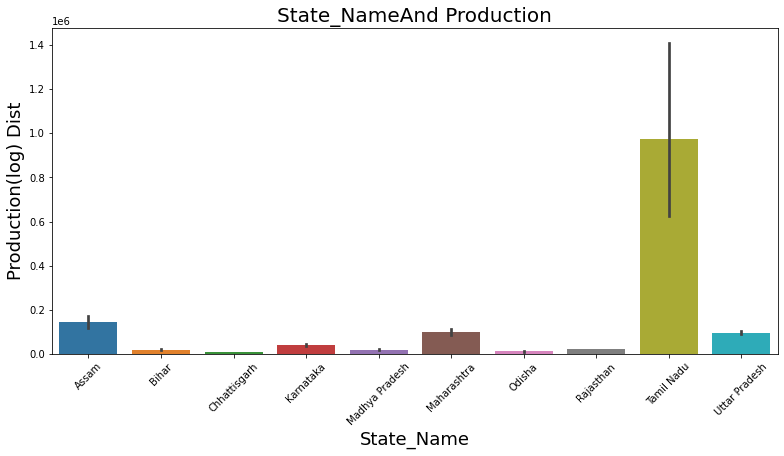

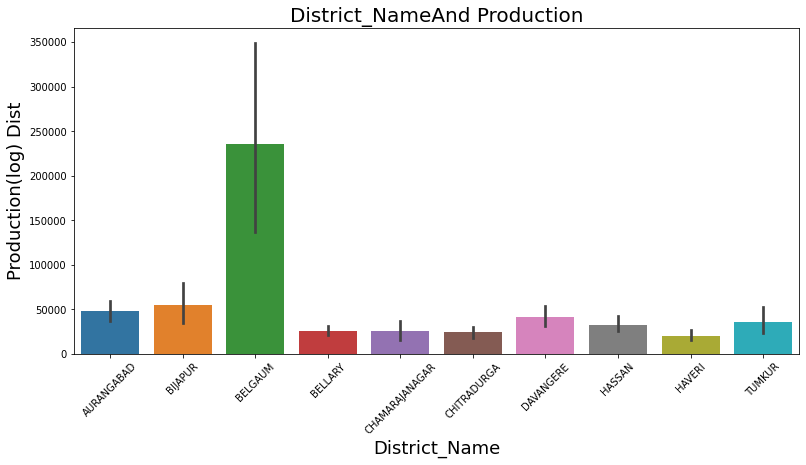

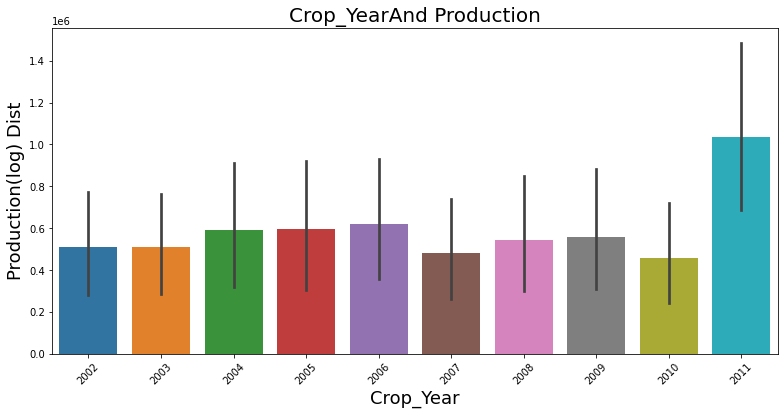

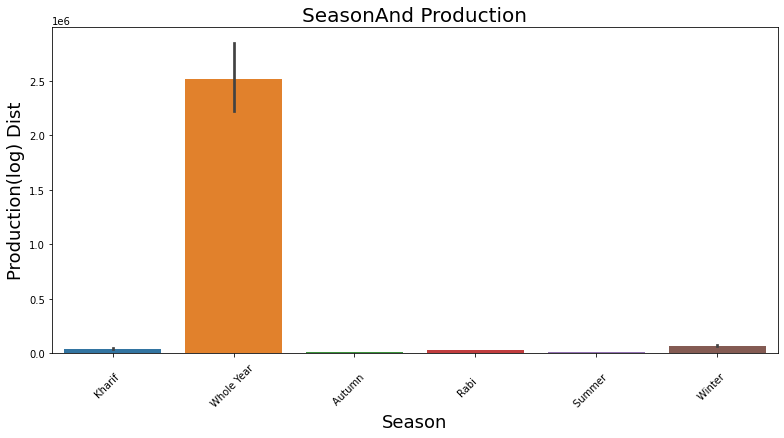

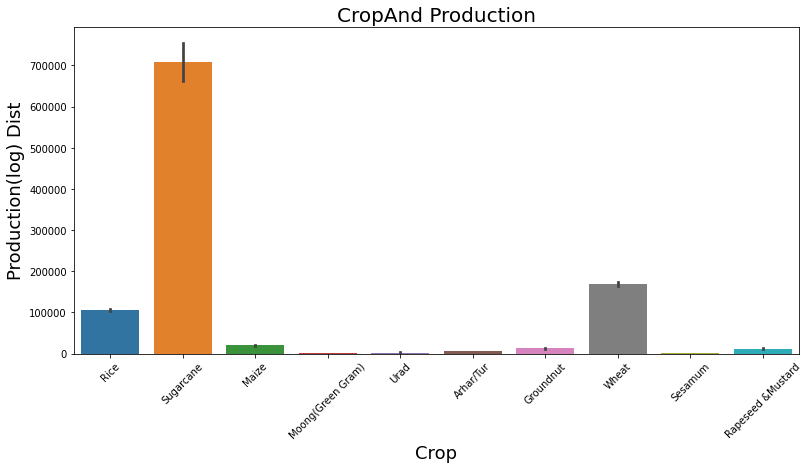

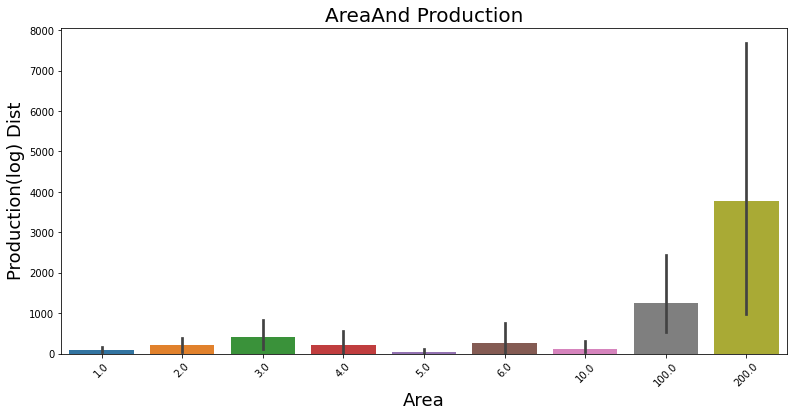

In [ ]:
# State Name and Production
train_df["Production"] = train_df["Production"].astype('float')

for col in train_df.columns[:6]:
  plt.figure(figsize=(13,6)) #figure size
  #It's another way to plot our data. using a variable that contains the plot parameters
  g1 = sns.barplot(x=col, y='Production',data=train_df[(train_df[col].isin((train_df[col].value_counts()[:10].index.values))) & train_df['Production'] > 0])
  g1.set_title(col+'And Production', fontsize=20) # title and fontsize
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
  g1.set_xlabel(col, fontsize=18) # Xlabel
  g1.set_ylabel('Production(log) Dist', fontsize=18) #Ylabel
  plt.show()

##Split the data

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
train_df["Production"] = train_df["Production"].astype('float')

y=train_df['Production']
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(172263, 7) (172263,)
(73828, 7) (73828,)


In [ ]:
X_train.drop(['Production'], axis=1,inplace=True)
X_test.drop(['Production'],axis=1,inplace=True)
X_test.shape

(73828, 6)

<h3> <b>Categorical variable to One hot encoding</b></h3>

In [ ]:
#One hot encoding of State_Name
col='State_Name'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_state=list(X_train['State_Name'].unique())

vectorizer_col = CountVectorizer(vocabulary=train_state, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_state_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_state_one_hot.shape)
#For Cross validating data
#cv_state_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_state_one_hot.shape)

  # For testing data 
test_state_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_state_one_hot.shape)

['Andhra Pradesh', 'Uttarakhand', 'Rajasthan', 'Mizoram', 'Chhattisgarh', 'Odisha', 'Nagaland', 'Madhya Pradesh', 'Kerala', 'Uttar Pradesh', 'Punjab', 'Haryana', 'Karnataka', 'Assam', 'Bihar', 'Tripura', 'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Himachal Pradesh', 'West Bengal', 'Telangana ', 'Manipur', 'Jammu and Kashmir ', 'Meghalaya', 'Puducherry', 'Jharkhand', 'Sikkim', 'Arunachal Pradesh', 'Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Chandigarh', 'Goa']
Shape of matrix after one hot encodig  (172263, 33)
Shape of matrix after one hot encodig  (73828, 33)


In [ ]:
col='District_Name'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_district=list(X_train['District_Name'].unique())
vectorizer_col = CountVectorizer(vocabulary=train_district, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_district_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_district_one_hot.shape)
#For Cross validating data
#cv_district_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_district_one_hot.shape)

  # For testing data 
test_district_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_district_one_hot.shape)

['KRISHNA', 'PAURI GARHWAL', 'BHARATPUR', 'LUNGLEI', 'DANTEWADA', 'SONEPUR', 'WOKHA', 'HOSHANGABAD', 'WEST GODAVARI', 'KANNUR', 'JHALAWAR', 'MAHASAMUND', 'KUSHI NAGAR', 'KANDHAMAL', 'MAYURBHANJ', 'S.A.S NAGAR', 'GURGAON', 'KORAPUT', 'HARDA', 'DHENKANAL', 'SHIMOGA', 'SHAJAPUR', 'PRAKASAM', 'UDAIPUR', 'MANDSAUR', 'JAIPUR', 'HARDOI', 'BALLIA', 'BETUL', 'BALODA BAZAR', 'KARBI ANGLONG', 'PRATAPGARH', 'BHOJPUR', 'CACHAR', 'BUDAUN', 'WEST TRIPURA', 'JAISALMER', 'SANGLI', 'SIDDHARTH NAGAR', 'VISAKHAPATANAM', 'KAMRUP', 'BELGAUM', 'NAGPUR', 'WASHIM', 'RUDRA PRAYAG', 'VIRUDHUNAGAR', 'SEHORE', 'CHAMPHAI', 'RUPNAGAR', 'MOKOKCHUNG', 'PEREN', 'DHARMAPURI', 'UDALGURI', 'MAHENDRAGARH', 'VALSAD', 'KENDUJHAR', 'KANGRA', 'BANGALORE RURAL', 'MURSHIDABAD', 'MADHEPURA', 'MANDYA', 'KURNOOL', 'THIRUVALLUR', 'VELLORE', 'MUZAFFARPUR', 'KARAULI', 'BANKURA', 'MAHBUBNAGAR', 'ERODE', 'CHANDEL', 'SAHARSA', 'DAUSA', 'PUNE', 'NABARANGPUR', 'NAINITAL', 'BALAGHAT', 'GONDA', 'WARDHA', 'SURAT', 'SIVAGANGA', 'GADAG', 'GULBA

In [ ]:
col='Crop'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_crop=list(X_train['Crop'].unique())


vectorizer_col = CountVectorizer(vocabulary=train_crop, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_crop_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_crop_one_hot.shape)
#For Cross validating data
#cv_crop_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_crop_one_hot.shape)

  # For testing data 
test_crop_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_crop_one_hot.shape)

['Rice', 'Sugarcane', 'Sannhamp', 'Tobacco', 'Wheat', 'Small millets', 'Other  Rabi pulses', 'Garlic', 'Sunflower', 'Turmeric', 'Ragi', 'Moong(Green Gram)', 'Masoor', 'Arhar/Tur', 'Maize', 'Sesamum', 'Potato', 'Safflower', 'Jowar', 'Barley', 'Gram', 'Bajra', 'Linseed', 'Sweet potato', 'Peas & beans (Pulses)', 'other oilseeds', 'Rapeseed &Mustard', 'Onion', 'Cardamom', 'Urad', 'Other Cereals & Millets', 'Tapioca', 'Horse-gram', 'Groundnut', 'Castor seed', 'Total foodgrain', 'Dry chillies', 'Dry ginger', 'Cotton(lint)', 'Jute', 'Banana', 'Other Kharif pulses', 'Pulses total', 'Soyabean', 'Coriander', 'Cabbage', 'Mesta', 'Cowpea(Lobia)', 'Coconut ', 'Niger seed', 'Bhindi', 'Arecanut', 'Brinjal', 'Korra', 'Khesari', 'Papaya', 'Samai', 'Pome Fruit', 'Black pepper', 'Cashewnut', 'Other Fresh Fruits', 'Guar seed', 'Paddy', 'Cashewnut Raw', 'other misc. pulses', 'Orange', 'Oilseeds total', 'Pineapple', 'Tomato', 'Rajmash Kholar', 'Yam', 'Mango', 'Cashewnut Processed', 'Other Vegetables', 'Bean

In [ ]:
col='Season'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_season=list(X_train['Season'].unique())


vectorizer_col = CountVectorizer(vocabulary=train_season, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_season_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_season_one_hot.shape)
#For Cross validating data
#cv_season_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_season_one_hot.shape)

  # For testing data 
test_season_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_season_one_hot.shape)

['Rabi       ', 'Whole Year ', 'Summer     ', 'Kharif     ', 'Winter     ', 'Autumn     ']
Shape of matrix after one hot encodig  (172263, 6)
Shape of matrix after one hot encodig  (73828, 6)


In [ ]:
cropyear_list=list(X_train.Crop_Year.unique())

vectorizer_col = CountVectorizer(vocabulary=cropyear_list, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_cropyear_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_cropyear_one_hot.shape)
#For Cross validating data
#cv_cropyear_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_cropyear_one_hot.shape)

  # For testing data 
test_cropyear_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_cropyear_one_hot.shape)

[2012, 2007, 2000, 2006, 2011, 1998, 2010, 2013, 2009, 1999, 2008, 2005, 2003, 2001, 2004, 1997, 2014, 2002, 2015]
Shape of matrix after one hot encodig  (172263, 19)
Shape of matrix after one hot encodig  (73828, 19)


<h3><b> Normalized Numerical Data</b> </h3>

In [ ]:
# For Area
from sklearn.preprocessing import Normalizer


normalizer = Normalizer()
normalizer.fit(X_train['Area'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
Area_normalized_train = normalizer.transform(X_train['Area'].values.reshape(1,-1))
# For Training Data
Area_normalized_test= normalizer.transform(X_test['Area'].values.reshape(1,-1))

print("After Area Normalization")
print(Area_normalized_train.shape, y_train.shape)
print(Area_normalized_test.shape, y_test.shape)
print('='*50)

After Area Normalization
(1, 172263) (172263,)
(1, 73828) (73828,)


<h2> Combine All categorical and Numerical Data</h2>

In [ ]:
from scipy.sparse import hstack
X_tr=hstack((train_state_one_hot,train_district_one_hot,train_cropyear_one_hot,train_crop_one_hot,train_season_one_hot,Area_normalized_train.T)).tocsr()
X_te=hstack((test_state_one_hot,test_district_one_hot,test_cropyear_one_hot,test_crop_one_hot,test_season_one_hot,Area_normalized_test.T)).tocsr()
#X_cv=hstack((cv_state_one_hot,cv_district_one_hot,cv_cropyear_one_hot,cv_crop_one_hot,cv_season_one_hot,Area_normalized_cv.T)).tocsr()

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
#print(X_cv.shape, y_cv.shape)


Final Data Matrix
(172263, 829) (172263,)
(73828, 829) (73828,)


In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

<h2> <b> Linear Regresssion Model </b> </h2>

In [ ]:

from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
model = lm.fit(X_tr, y_train)
predt_test = lm.predict(X_te)
print(mean_squared_error(y_test,predt_test))

print(len(model.coef_))


241116104525435.3
829


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH

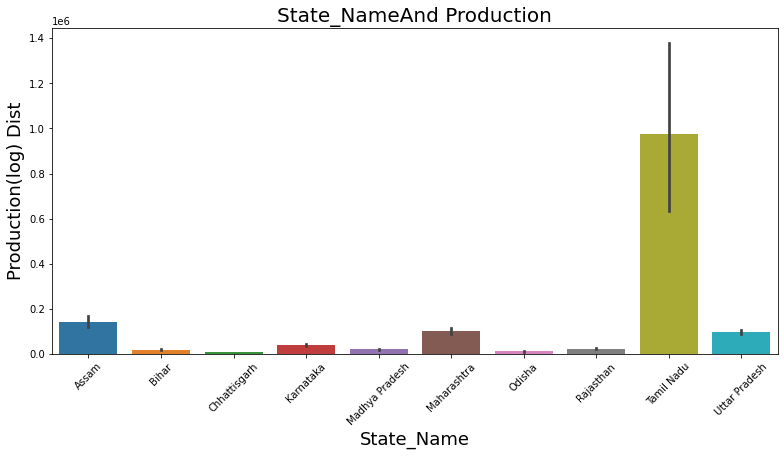

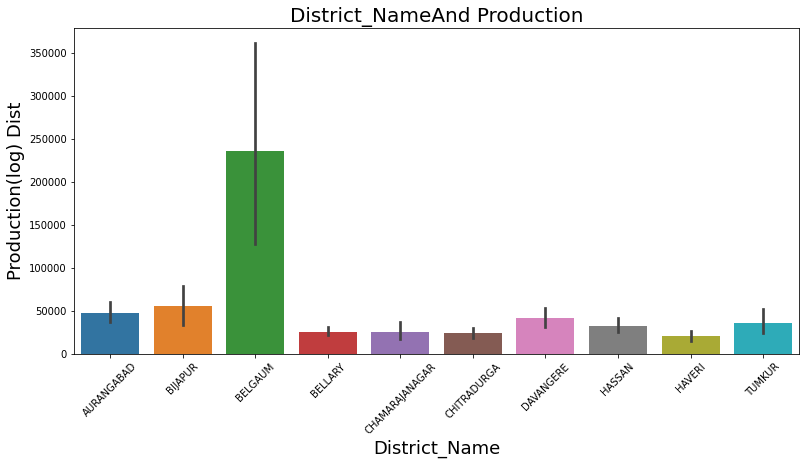

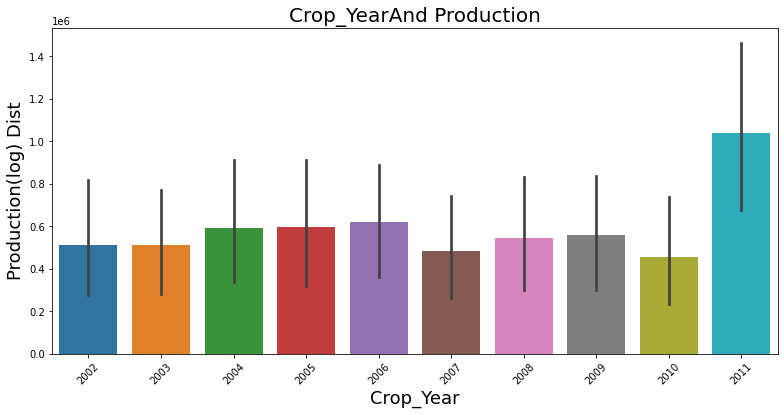

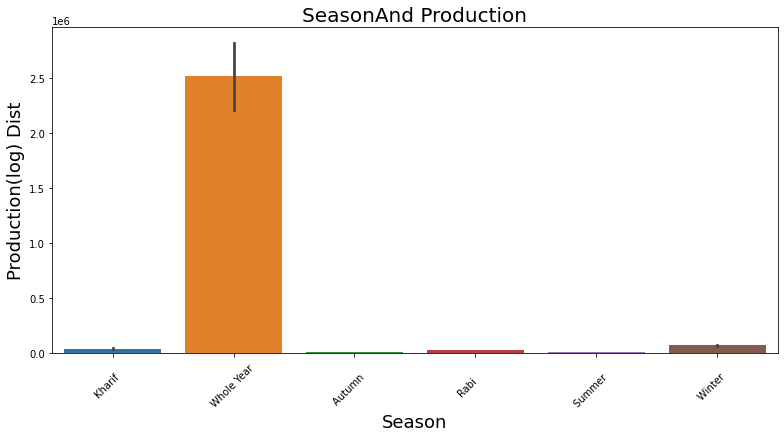

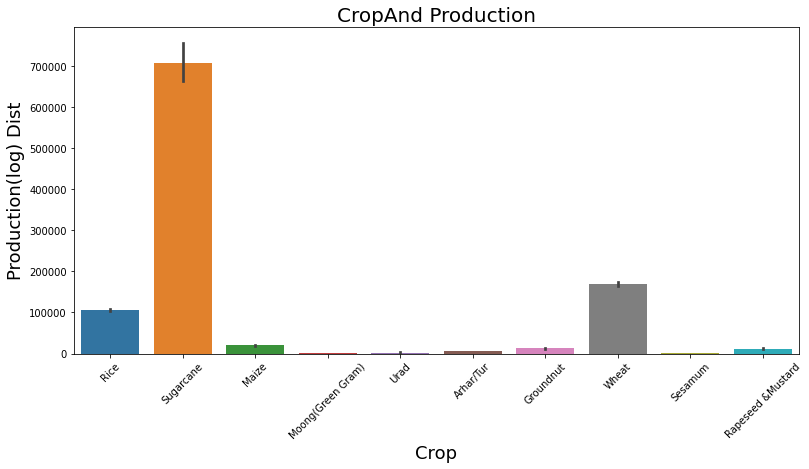

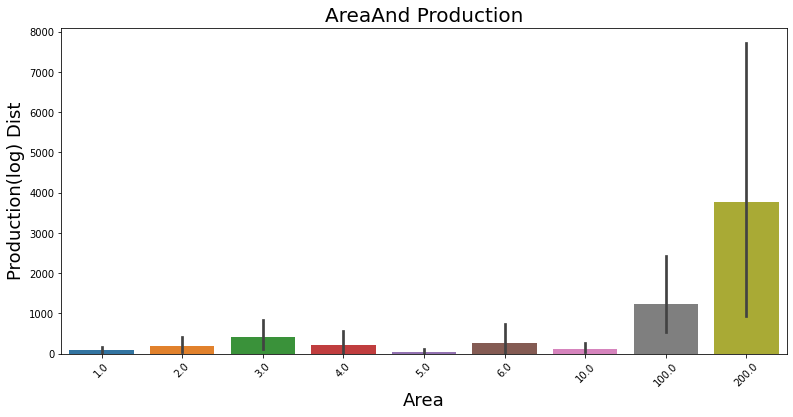

(172263, 7) (172263,)
(73828, 7) (73828,)
['Uttar Pradesh', 'West Bengal', 'Rajasthan', 'Odisha', 'Andhra Pradesh', 'Assam', 'Maharashtra', 'Bihar', 'Karnataka', 'Goa', 'Uttarakhand', 'Tamil Nadu', 'Himachal Pradesh', 'Madhya Pradesh', 'Telangana ', 'Gujarat', 'Nagaland', 'Chhattisgarh', 'Puducherry', 'Kerala', 'Meghalaya', 'Punjab', 'Haryana', 'Jammu and Kashmir ', 'Sikkim', 'Mizoram', 'Arunachal Pradesh', 'Manipur', 'Jharkhand', 'Andaman and Nicobar Islands', 'Tripura', 'Dadra and Nagar Haveli', 'Chandigarh']
Shape of matrix after one hot encodig  (172263, 33)
Shape of matrix after one hot encodig  (73828, 33)
['ETAWAH', 'HATHRAS', 'MEDINIPUR WEST', 'ALWAR', 'BALANGIR', 'VIZIANAGARAM', 'KOKRAJHAR', 'NABARANGPUR', 'JALNA', 'MADHUBANI', 'BHANDARA', 'BAGALKOT', 'RAYAGADA', 'BANKA', 'DINAJPUR UTTAR', 'EAST GODAVARI', 'DHUBRI', 'MORADABAD', 'KANNAUJ', 'KODAGU', 'GADCHIROLI', 'BARABANKI', 'SOUTH GOA', 'JAMUI', 'CHAMOLI', 'KANPUR NAGAR', 'TUTICORIN', 'SHAHJAHANPUR', 'GAUTAM BUDDHA NAGAR', '

ValueError: ignored

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()



from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


import pandas as pd
train_df=pd.read_csv('crop_production.csv')

train_df.head()


# Null value in database
train_df.isnull().any()

#Unique value in database
for col in train_df.columns:
  print(train_df[col].unique())
  print('='*100)


#Replace the value
train_df['Production'].value_counts()
train_df['Production']=train_df['Production'].replace('=','0')

#Missing values in dataset
for col in train_df.columns:
    nullrow=train_df[col].isnull().sum()
    notrow=train_df[col].notnull().sum()
    percentage=(nullrow*100)/(nullrow+notrow)
    print("Column is ",col,percentage,"% Missing Values")

col=train_df.columns[:6]
col

train_df["Production"] = train_df["Production"].astype('float')

for col in train_df.columns[:6]:
  plt.figure(figsize=(13,6)) #figure size
  #It's another way to plot our data. using a variable that contains the plot parameters
  g1 = sns.barplot(x=col, y='Production',data=train_df[(train_df[col].isin((train_df[col].value_counts()[:10].index.values))) & train_df['Production'] > 0])
  g1.set_title(col+'And Production', fontsize=20) # title and fontsize
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
  g1.set_xlabel(col, fontsize=18) # Xlabel
  g1.set_ylabel('Production(log) Dist', fontsize=18) #Ylabel
  plt.show()


import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt



y=train_df['Production']
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3)
#X_train,X_cv,y_train,y_cv=train_test_split(x_train,Y_train,test_size=0.2)
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)


X_train.drop(['Production'], axis=1,inplace=True)
X_test.drop(['Production'],axis=1,inplace=True)
#X_cv.drop(['Production'],axis=1,inplace=True)
X_test.shape


#One hot encoding of State_Name
col='State_Name'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_state=list(X_train['State_Name'].unique())

vectorizer_col = CountVectorizer(vocabulary=train_state, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_state_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_state_one_hot.shape)
#For Cross validating data
#cv_state_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_state_one_hot.shape)

  # For testing data 
test_state_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_state_one_hot.shape)

col='District_Name'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_district=list(X_train['District_Name'].unique())
vectorizer_col = CountVectorizer(vocabulary=train_district, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_district_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_district_one_hot.shape)
#For Cross validating data
#cv_district_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_district_one_hot.shape)

  # For testing data 
test_district_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_district_one_hot.shape)


col='Crop'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_crop=list(X_train['Crop'].unique())


vectorizer_col = CountVectorizer(vocabulary=train_crop, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_crop_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_crop_one_hot.shape)
#For Cross validating data
#cv_crop_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_crop_one_hot.shape)

  # For testing data 
test_crop_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_crop_one_hot.shape)



col='Season'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_season=list(X_train['Season'].unique())


vectorizer_col = CountVectorizer(vocabulary=train_season, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_season_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_season_one_hot.shape)
#For Cross validating data
#cv_season_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_season_one_hot.shape)

  # For testing data 
test_season_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_season_one_hot.shape)



cropyear_list=list(X_train.Crop_Year.unique())

vectorizer_col = CountVectorizer(vocabulary=cropyear_list, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_cropyear_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_cropyear_one_hot.shape)
#For Cross validating data
#cv_cropyear_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_cropyear_one_hot.shape)

  # For testing data 
test_cropyear_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_cropyear_one_hot.shape)


# For Area
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

normalizer = Normalizer()
normalizer.fit(X_train['Area'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
Area_normalized_train = normalizer.transform(X_train['Area'].values.reshape(1,-1))
# For Training Data
Area_normalized_test= normalizer.transform(X_test['Area'].values.reshape(1,-1))
# For Validating Data
#Area_normalized_cv= normalizer.transform(X_cv['Area'].values.reshape(1,-1))

print("After Area Normalization")
print(Area_normalized_train.shape, y_train.shape)
print(Area_normalized_test.shape, y_test.shape)
#print(Area_normalized_cv.shape, y_cv.shape)

print('='*50)


from scipy.sparse import hstack
X_tr=hstack((train_state_one_hot,train_district_one_hot,train_cropyear_one_hot,train_crop_one_hot,train_season_one_hot,Area_normalized_train.T)).tocsr()
X_te=hstack((test_state_one_hot,test_district_one_hot,test_cropyear_one_hot,test_crop_one_hot,test_season_one_hot,Area_normalized_test.T)).tocsr()
#X_cv=hstack((cv_state_one_hot,cv_district_one_hot,cv_cropyear_one_hot,cv_crop_one_hot,cv_season_one_hot,Area_normalized_cv.T)).tocsr()

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
#print(X_cv.shape, y_cv.shape)


def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred



import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#%matplotlib inline


from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
model = lm.fit(X_tr, y_train)
predt_test = lm.predict(X_te)
print(mean_squared_error(y_test,predt_test))

print(len(model.coef_))


import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
Final Data matrix
((22445, 10144), (22445,))
((11055, 10144), (11055,))
((16500, 10144), (16500,))
====================================================================================================
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
neigh =linear_model.LinearRegression()
neigh.fit(X_tr, y_train)
y_train_pred =neigh.predict(X_tr)
y_cv_pred =neigh.predict(X_tr)
mean_squared_error(y_train_pred,y_cv_pred)

lm = linear_model.LinearRegression()
model = lm.fit(X_tr, y_train)
predictions = lm.predict(X_te)
mean_squared_error(y_test,predictions)
print(model.coef_)



import xgboost as xgb
model1=xgb.XGBRegressor()
model1.fit(X_tr,y_train)
print(model1)
pred=model.predict(X_te)
print(mean_squared_error(y_test,pred))




from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
estimators=[10, 50, 100, 200, 300,500, 1000]
depth=[2, 3, 4,7, 8, 10,12]

for n in estimators:
  for d in depth:
    model =xgb.XGBRegressor(n_estimators=n,learning_rate=0.01,max_depth=d,n_jobs=-1,random_state=2)
    model.fit(X_tr,y_train)
    pred=model.predict(X_te)
    print(mean_squared_error(y_test,pred))


##Linear Regression Model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
Final Data matrix
((22445, 10144), (22445,))
((11055, 10144), (11055,))
((16500, 10144), (16500,))
====================================================================================================
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
neigh =linear_model.LinearRegression()
neigh.fit(X_tr, y_train)
y_test_pred =neigh.predict(X_te)
#y_cv_pred =neigh.predict(X_cv)
mean_squared_error(y_test,y_test_pred)


241116104525435.3

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_tr, y_train)
predictions = lm.predict(X_te)
mean_squared_error(y_test,predictions)
print(model.coef_)
print(mean_squared_error(y_test,predictions))

[ 0.00000000e+00 -1.50099316e+06 -1.33461461e+06 -1.08065839e+06
 -1.03788102e+06 -1.15888400e+06 -1.02323732e+06  0.00000000e+00
  2.23823370e+07  0.00000000e+00 -1.36413284e+06 -1.41026356e+06
 -9.87606754e+05 -9.26256551e+05 -1.26436520e+06 -1.37981678e+06
 -1.52060913e+06  0.00000000e+00 -1.68044314e+06  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.15519955e+05  0.00000000e+00
 -8.03635164e+05  2.60577794e+05 -1.02031503e+06 -1.39492368e+06
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.34680187e+05
  1.62489128e+06 -6.98806898e+05  0.00000000e+00 -3.48108639e+05
 -5.79308610e+04 -4.41228242e+05  7.38473192e+03 -1.07267605e+05
 -1.51017784e+06  0.00000000e+00  1.08926685e+07 -3.02759325e+05
 -4.50285929e+05  0.00000000e+00  8.90336965e+04 -1.72231808e+05
  0.00000000e+00  1.69964844e+04 -7.80555664e+04 -1.40996899e+06
  6.39461176e+04 -3.64376298e+04 -1.62226505e+06 -1.20724656e+06
 -3.19527314e+05 -1.61319863e+06 -6.40440236e+05 -1.37062094e+06
 -1.38684324e+06 -1.60459

In [ ]:
import xgboost as xgb
model1=xgb.XGBRegressor(n_estimators=1000,learning_rate=0.01,max_depth=2,n_jobs=-1,random_state=2)
model1.fit(X_tr,y_train)
print(model1)
pred=model.predict(X_te)
print(mean_squared_error(y_test,pred))


[04:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
391840535195630.0


<h2><b> Hyper Parameter Tunning through GridSearchCV in XGboost </b></h2>

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
estimators=[10, 50, 100, 200, 300,500, 1000]
depth=[2, 3, 4,7, 8, 10,12]

for n in estimators:
  for d in depth:
    model =xgb.XGBRegressor(n_estimators=n,learning_rate=0.01,max_depth=d,n_jobs=-1,random_state=2)
    model.fit(X_tr, y_train)
    pred=model.predict(X_te)
    print(mean_squared_error(y_test,pred))
    print(n,d,"\n")

    


[03:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
225067863552662.62
10 2 

[03:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
217301479360221.53
10 3 

[03:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
228412472408679.06
10 4 

[03:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
243196367600026.12
10 7 

[03:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
245614334119734.53
10 8 

[03:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
246761065991174.84
10 10 

[03:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is

##<b>Conclusion</b>

<ol>Steps of Creating this model
  <li>Check Null and Missing Values in Dataset</li>
  <li> Do EDA </li>
  <li> Convert Categorical variable into one hot encoding </li>
  <li> normalized the numerical data</li>
  <li> Create a simple model </li>
  <li> Get RMSE score </li>
</ol>
I just want to know that the score that is got is valid or not.
And is there any procedure is missing or tell me right way to create a model.

Where I am getting wrong ! tell me......